In [1]:
#pip install statsmodels

In [2]:
import openpyxl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

In [3]:
df = pd.read_excel('./M02_DataSets/DATA_Coaches.xlsx',engine='openpyxl')

In [4]:
df.describe()

,t1scs1,t1scs2,t1scs3,t1scs4,t1scs5,t1scs6,t1scs7,t1scs8,t1scs9,t1scs10,...,t3cbq12,t3cbq13,t3cbq14,t3cbq15,t3ssq1,t3ssq2,t3ssq3,t3ssq4,t3ssq5,t3ssq6
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,...,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,8.099526,8.201422,8.860190,8.855450,7.950237,7.744076,8.644550,8.180095,8.225118,7.412322,...,387.127962,386.914692,382.395735,386.864929,388.277251,388.606635,388.478673,388.457346,388.483412,388.464455
std,67.638234,68.458283,68.410955,67.585122,68.479342,68.492494,68.426785,67.634590,67.630153,68.516764,...,485.981977,486.151265,480.209295,486.190762,485.069049,484.807454,484.909119,484.926090,484.905504,484.920634
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,4.000000,3.000000,3.000000,2.000000,...,2.000000,1.000000,2.000000,1.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
50%,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,999.000000,999.000000,987.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
max,987.000000,999.000000,999.000000,987.000000,999.000000,999.000000,999.000000,987.000000,987.000000,999.000000,...,999.000000,999.000000,987.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000


### Preparación de datos:
Aplicación de un filtro de exclusión para descartar registros que tengan valores fuera del rango de 1 a 5

In [5]:
# Definir rango válido de 1 a 5
valid_range = set(range(1, 6))
# Función para filtrar filas según el rango válido
def is_valid(row):
    return all(value in valid_range for value in row)
# Aplicar la función de filtro a cada fila.
df_cleaned = df[df.apply(is_valid, axis=1)]

In [6]:
df_cleaned.describe()

,t1scs1,t1scs2,t1scs3,t1scs4,t1scs5,t1scs6,t1scs7,t1scs8,t1scs9,t1scs10,...,t3cbq12,t3cbq13,t3cbq14,t3cbq15,t3ssq1,t3ssq2,t3ssq3,t3ssq4,t3ssq5,t3ssq6
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,...,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,3.484496,3.457364,4.193798,4.263566,3.182171,3.003876,3.903101,3.620155,3.635659,2.701550,...,2.050388,1.701550,1.887597,1.620155,3.926357,4.461240,4.251938,4.217054,4.259690,4.228682
std,1.018196,0.895364,0.695483,0.908408,1.137336,1.075001,0.819456,1.085409,1.009203,1.150232,...,0.904689,0.808562,0.665259,0.781038,0.807554,0.827806,0.856706,0.886222,0.985499,1.042870
min,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,3.000000,4.000000,4.000000,4.500000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,...,2.000000,2.000000,2.000000,1.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000
75%,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,3.000000,2.000000,2.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### 1. Tarea
Cread una función que permita invertir la puntuación de los ítems de las escalas incorporadas en la base de datos “DATA_coaches”. A pesar que en esta base de datos todas las escalas tienen el mismo rango en la escala ordinal (de 1 a 5 puntos) haced que la función permita trabajar con cualquier escala ordinal a la que se le quiera invertir la puntuación. (1.5 puntos)

In [7]:
def invert_values(df, value_max, value_min, columns_to_invert):
    df_inverted = df.copy()
    df_inverted[columns_to_invert] = value_max + value_min - df[columns_to_invert]
    return df_inverted

### 2. Tarea
Utilizad la función anterior para invertir los ítems descritos en la Tabla 1 cuya codificación reza como inversa. Hecho esto, guardad estas nuevas variables sobre las originales. (1 punto)

In [8]:
value_max = df_cleaned.max().max()
value_min = df_cleaned.min().min()

In [9]:
# Columns to apply the function on
columns_to_invert = [
't1scs1', 't1scs4', 't1scs8', 't1scs9', 't1scs11', 't1scs12', 
't2scs1', 't2scs4', 't2scs8', 't2scs9', 't2scs11', 't2scs12', 
't3scs1', 't3scs4', 't3scs8', 't3scs9', 't3scs11', 't3scs12', 
't1cbq1', 't1cbq14',
't2cbq1', 't2cbq14', 
't3cbq1', 't3cbq14']

In [10]:
# Invert values for specified columns using the function
df_inverted = invert_values(df_cleaned, value_max, value_min, columns_to_invert)

In [11]:
df_inverted.describe()

,t1scs1,t1scs2,t1scs3,t1scs4,t1scs5,t1scs6,t1scs7,t1scs8,t1scs9,t1scs10,...,t3cbq12,t3cbq13,t3cbq14,t3cbq15,t3ssq1,t3ssq2,t3ssq3,t3ssq4,t3ssq5,t3ssq6
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,...,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,2.515504,3.457364,4.193798,1.736434,3.182171,3.003876,3.903101,2.379845,2.364341,2.701550,...,2.050388,1.701550,4.112403,1.620155,3.926357,4.461240,4.251938,4.217054,4.259690,4.228682
std,1.018196,0.895364,0.695483,0.908408,1.137336,1.075001,0.819456,1.085409,1.009203,1.150232,...,0.904689,0.808562,0.665259,0.781038,0.807554,0.827806,0.856706,0.886222,0.985499,1.042870
min,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,4.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,3.000000,4.000000,4.000000,1.500000,3.000000,3.000000,4.000000,2.000000,2.000000,3.000000,...,2.000000,2.000000,4.000000,1.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000
75%,3.000000,4.000000,5.000000,2.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,...,3.000000,2.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Los valores máximo y mínimo se mantuvieron iguales y se cambió la media.

Prueba para comparar las escalas en la primera línea del df

In [12]:
df_cleaned.loc[:0]

,t1scs1,t1scs2,t1scs3,t1scs4,t1scs5,t1scs6,t1scs7,t1scs8,t1scs9,t1scs10,...,t3cbq12,t3cbq13,t3cbq14,t3cbq15,t3ssq1,t3ssq2,t3ssq3,t3ssq4,t3ssq5,t3ssq6
0,3,4,4,5,3,3,3,4,4,2,...,2,2,2,1,4,4,5,4,4,5


In [13]:
df_inverted.loc[:0]

,t1scs1,t1scs2,t1scs3,t1scs4,t1scs5,t1scs6,t1scs7,t1scs8,t1scs9,t1scs10,...,t3cbq12,t3cbq13,t3cbq14,t3cbq15,t3ssq1,t3ssq2,t3ssq3,t3ssq4,t3ssq5,t3ssq6
0,3,4,4,1,3,3,3,2,2,2,...,2,2,4,1,4,4,5,4,4,5


Se observa que para las variables seleccionadas, los valores se invirtieron:
- Valor 1 cambió al valor 5
- Valor 2 cambió al valor 4
- Valor 3 sigue siendo el mismo
- Valor 4 cambió al valor 2
- Valor 5 cambió al valor 1

Reemplezando los valores en el df orginal

In [14]:
df = df_inverted

### 3. Tarea
Calculad las puntuaciones totales de las escalas (autocompasión, burnout y apoyo social percibido). Guardad estas nuevas variables en la base de datos. (1 punto)

In [15]:
autocompasion1 = df.filter(regex='^t1scs')
autocompasion2 = df.filter(regex='^t2scs')
autocompasion3 = df.filter(regex='^t3scs')
burnout1 = df.filter(regex='^t1cbq')
burnout2 = df.filter(regex='^t2cbq')
burnout3 = df.filter(regex='^t3cbq')
apoyo_social1 = df.filter(regex='^t1ssq')
apoyo_social2 = df.filter(regex='^t2ssq')
apoyo_social3 = df.filter(regex='^t3ssq')

In [16]:
df['autocompasion1'] = autocompasion1.sum(axis=1)
df['autocompasion2'] = autocompasion2.sum(axis=1)
df['autocompasion3'] = autocompasion3.sum(axis=1)
df['burnout1'] = burnout1.sum(axis=1)
df['burnout2'] = burnout2.sum(axis=1)
df['burnout3'] = burnout3.sum(axis=1)
df['apoyo_social1'] = apoyo_social1.sum(axis=1)
df['apoyo_social2'] = apoyo_social2.sum(axis=1)
df['apoyo_social3'] = apoyo_social3.sum(axis=1)

In [17]:
df.head()

,t1scs1,t1scs2,t1scs3,t1scs4,t1scs5,t1scs6,t1scs7,t1scs8,t1scs9,t1scs10,...,t3ssq6,autocompasion1,autocompasion2,autocompasion3,burnout1,burnout2,burnout3,apoyo_social1,apoyo_social2,apoyo_social3
0,3,4,4,1,3,3,3,2,2,2,...,5,32,26,32,27,29,32,24,25,26
1,1,4,4,2,5,2,4,1,1,4,...,5,31,28,33,28,23,28,25,28,25
2,1,5,5,1,4,5,5,1,2,2,...,5,34,32,29,26,28,24,30,30,30
3,3,3,4,2,3,3,3,2,3,4,...,4,38,35,34,26,25,30,24,25,26
4,3,3,5,1,3,4,2,2,3,4,...,5,36,32,31,25,24,30,30,30,30


### 4. Tarea
Con las nuevas variables calculadas en el apartado anterior, haced una descripción estadística de las mismas en los tres momentos de estudio. Una posibilidad de tabla resumen sería la plantilla mostrada en la Tabla 2.(1 puntos)

In [18]:
df_new = df[['autocompasion1', 'burnout1', 'apoyo_social1',
             'autocompasion2', 'burnout2', 'apoyo_social2',
             'autocompasion3', 'burnout3', 'apoyo_social3']]

In [19]:
stat = df_new.describe()
stat

,autocompasion1,burnout1,apoyo_social1,autocompasion2,burnout2,apoyo_social2,autocompasion3,burnout3,apoyo_social3
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,34.228682,33.155039,25.290698,34.720930,33.713178,25.236434,34.337209,33.689922,25.344961
std,4.661085,6.800034,3.954605,4.181629,7.077331,4.286699,4.796912,7.347197,4.084848
min,16.000000,21.000000,12.000000,19.000000,22.000000,8.000000,12.000000,21.000000,7.000000
25%,32.000000,28.000000,23.000000,32.000000,29.000000,23.000000,32.000000,29.000000,23.000000
50%,34.500000,33.000000,26.000000,35.000000,33.500000,26.000000,34.000000,33.000000,26.000000
75%,38.000000,37.000000,28.000000,37.000000,38.000000,29.000000,37.000000,37.750000,29.000000
max,45.000000,56.000000,30.000000,45.000000,64.000000,30.000000,47.000000,68.000000,30.000000


### 5. Tarea
Complementad el análisis anterior con gráficos adecuados que permitan evaluar la evolución de las 3 dimensiones a lo largo del tiempo. (1 punto)

In [20]:
mean_values_autocomp1 = stat.loc['mean', 'autocompasion1']
mean_values_burnout1 = stat.loc['mean', 'burnout1']
mean_values_apoyo1 = stat.loc['mean', 'apoyo_social1']
mean_values_autocomp2 = stat.loc['mean', 'autocompasion2']
mean_values_burnout2 = stat.loc['mean', 'burnout2']
mean_values_apoyo2 = stat.loc['mean', 'apoyo_social2']
mean_values_autocomp3 = stat.loc['mean', 'autocompasion3']
mean_values_burnout3 = stat.loc['mean', 'burnout3']
mean_values_apoyo3 = stat.loc['mean', 'apoyo_social3']

In [21]:
# Create a new DataFrame with the mean values
mean_df = pd.DataFrame({
    'autocompasion': [mean_values_autocomp1, mean_values_autocomp2, mean_values_autocomp3],
    'burnout': [mean_values_burnout1, mean_values_burnout2, mean_values_burnout3],
    'apoyo_social': [mean_values_apoyo1, mean_values_apoyo2, mean_values_apoyo3]
}, index=['Línea Base', '3 Meses', '6 Meses'])
mean_df

,autocompasion,burnout,apoyo_social
Línea Base,34.228682,33.155039,25.290698
3 Meses,34.720930,33.713178,25.236434
6 Meses,34.337209,33.689922,25.344961


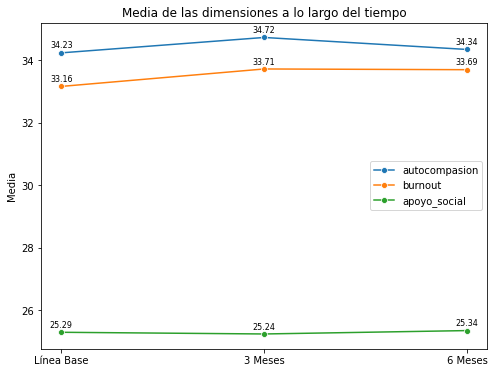

In [22]:
# Plotting with seaborn
plt.figure(figsize=(8, 6))
for column in mean_df.columns:
    sns.lineplot(x=mean_df.index, y=mean_df[column], marker='o',label=column)
    for i, value in enumerate(mean_df[column]):
        plt.annotate(f'{value:.2f}', (mean_df.index[i], value), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)


plt.title('Media de las dimensiones a lo largo del tiempo')
plt.ylabel('Media')
plt.legend()
plt.show()

**Autocompasión e Burnout:** Con relación a la línea base, se observa que el promedio aumenta en 3 meses y luego disminuye en 6 meses.

**Apoyo Social:** Con relación a la línea base, se observa que el promedio disminuye en 3 meses y luego aumenta en 6 meses.

Incluso con la dimensión de apoyo social reduciendo el promedio en 3 meses, ambas dimensiones terminaron en 6 meses con un promedio superior al de referencia.

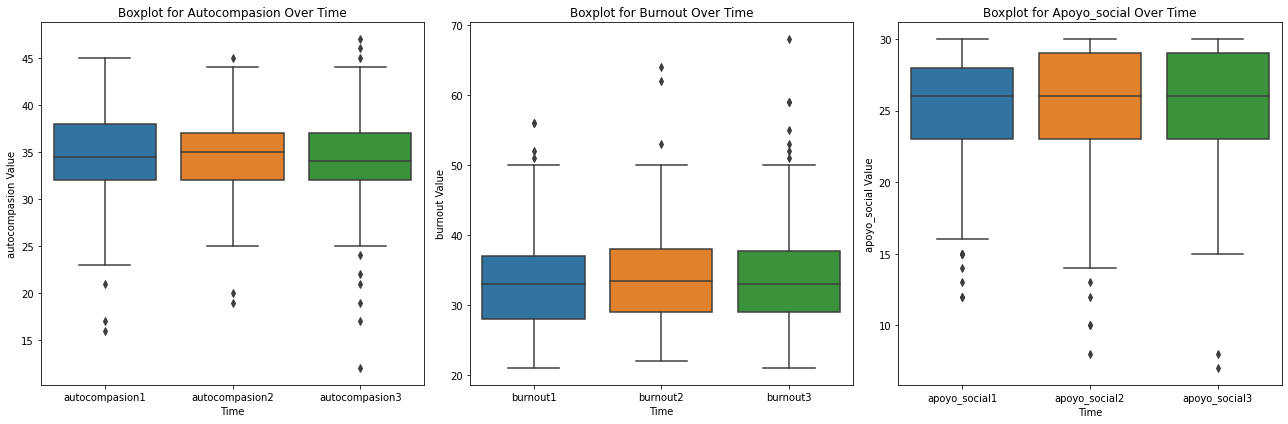

In [23]:
# Create separate boxplots for each dimension
fig, axes = plt.subplots(ncols=3, figsize=(18, 6))

dimensions = ['autocompasion', 'burnout', 'apoyo_social']

for i, dim in enumerate(dimensions):
    cols = [col for col in df_new.columns if dim in col]
    df_dim = df_new[cols]
    
    # Melt the DataFrame for boxplot
    df_dim_melted = pd.melt(df_dim, var_name='Time', value_name='Value')

    # Create a boxplot for the current dimension
    ax = sns.boxplot(x='Time', y='Value', data=df_dim_melted, ax=axes[i])
    ax.set_title(f'Boxplot for {dim.capitalize()} Over Time')
    ax.set_xlabel('Time')
    ax.set_ylabel(f'{dim} Value')

plt.tight_layout()
plt.show()

Los diagramas de caja anteriores muestran que los datos mantuvieron el mismo patrón a lo largo del tiempo. Lo que llama la atención en este análisis son los valores atípicos.

**Autocompassion:**
- Los valores atípicos aumentaron con el tiempo, tanto para valores altos como bajos. Esto muestra que para algunas personas hubo un gran cambio en la autocompasión a lo largo del tiempo.

**Burnout:**
- Los valores atípicos aumentaron con el tiempo hasta alcanzar valores de aproximadamente 70. Esto muestra que para algunas personas hubo un aumento en el agotamiento con el tiempo.

**Apoyo Social:**
- Los valores atípicos disminuyeron, pero los valores atípicos que aparecieron tuvieron valores más bajos con el tiempo. Esto muestra que para unas pocas personas hubo una gran disminución en el apoyo social con el tiempo.

### 6. Tarea
Estudiad todas las posibles **correlaciones** entre las dimensiones obtenidas en los apartados anteriores con indicadores adecuados y de forma separada para cada momento. Complementad estos análisis sobre correlaciones con gráficos adecuados. (1 punto)

In [24]:
correlation_matrix = df_new.corr()
correlation_matrix

,autocompasion1,burnout1,apoyo_social1,autocompasion2,burnout2,apoyo_social2,autocompasion3,burnout3,apoyo_social3
autocompasion1,1.000000,0.291790,-0.263056,0.626345,0.272463,-0.220826,0.584403,0.239546,-0.192583
burnout1,0.291790,1.000000,-0.334625,0.200765,0.753248,-0.213504,0.199748,0.723706,-0.213876
apoyo_social1,-0.263056,-0.334625,1.000000,-0.178608,-0.352775,0.766694,-0.162923,-0.310256,0.800210
autocompasion2,0.626345,0.200765,-0.178608,1.000000,0.200418,-0.143044,0.631075,0.162322,-0.149015
burnout2,0.272463,0.753248,-0.352775,0.200418,1.000000,-0.317496,0.196098,0.782726,-0.295495
apoyo_social2,-0.220826,-0.213504,0.766694,-0.143044,-0.317496,1.000000,-0.121213,-0.224737,0.774622
autocompasion3,0.584403,0.199748,-0.162923,0.631075,0.196098,-0.121213,1.000000,0.271480,-0.132453
burnout3,0.239546,0.723706,-0.310256,0.162322,0.782726,-0.224737,0.271480,1.000000,-0.280094
apoyo_social3,-0.192583,-0.213876,0.800210,-0.149015,-0.295495,0.774622,-0.132453,-0.280094,1.000000


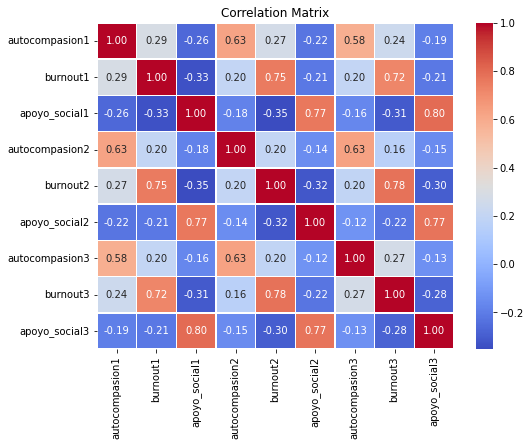

In [25]:
# Plot a heatmap for better visualization of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

La correlación negativa más fuerte (-0,35) se observó entre "apoyo_social1" y "burnout2". La segunda correlación negativa más grande (-0,33) se produce entre "apoyo_social1" y "burnout1", seguida de la tercera correlación negativa más grande (-0,32) entre "apoyo_social2" y "burnout2".

La correlación positiva más significativa (0,80) se encontró entre "apoyo_social1" y "apoyo_social3". La segunda correlación positiva más alta (0,78) se observa entre "burnout2" y "burnout3", y la tercera correlación positiva más alta (0,77) es entre "apoyo_social1" y "apoyo_social2".

En cuanto a las tendencias, cuando disminuye la percepción de apoyo social, hay una tendencia asociada a que el nivel de burnout disminuya, tanto en el mismo momento como en los tres meses siguientes. Por el contrario, cuando aumenta el apoyo social percibido, a esta tendencia le sigue un aumento continuo en los meses siguientes. De manera similar, un aumento en el nivel de burnout tiende a ir seguido de un aumento durante los próximos tres meses.

Estos patrones sugieren una fuerte asociación entre la percepción de apoyo social y el nivel de agotamiento. Cuando no hay signos de agotamiento, la necesidad de apoyo social puede no ser tan apremiante. Sin embargo, el aumento en la percepción de apoyo social puede indicar un posible aumento simultáneo en el nivel de burnout.

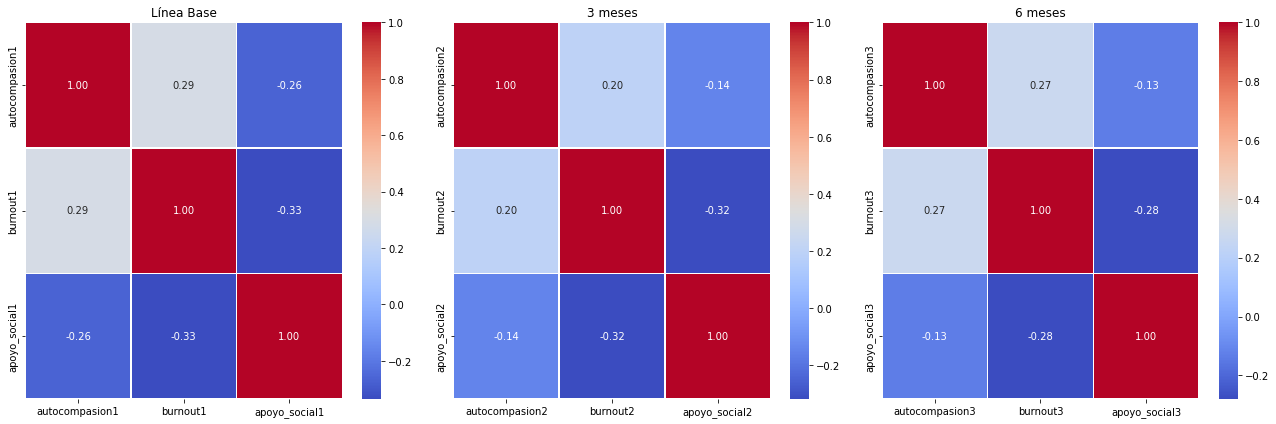

In [26]:
# Plot all three heatmaps in a single row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (time_df, time_label) in enumerate(zip([df[['autocompasion1', 'burnout1', 'apoyo_social1']],
                                               df[['autocompasion2', 'burnout2', 'apoyo_social2']],
                                               df[['autocompasion3', 'burnout3', 'apoyo_social3']]], 
                                              ['Línea Base', '3 meses', '6 meses']), 1):
    correlation_matrix = time_df.corr()
    
    # Plot a heatmap on each subplot
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, ax=axes[i-1])
    axes[i-1].set_title(f'{time_label}')

# Adjust layout
plt.tight_layout()
plt.show()

**Autocompasion** 
- Tiene una correlación positiva con el burnout. Cuando aumenta la autocompasión, el agotamiento también tiende a aumentar
- Tiene una correlación negativa con el apoyo social. Cuando la autocompasión aumenta, el apoyo social tiende a disminuir.

**Burnout**
- Tiene una correlación positiva con la automapasión. Cuando aumenta el agotamiento, la autocompasión también tiende a aumentar
- Tiene una correlación negativa con el apoyo social. Cuando aumenta el burnout, el apoyo social tiende a disminuir

**Apoyo Social:**
- Tiene una correlación negativa con la automapasión. Cuando el apoyo social disminuye, la autocompasión también tiende a disminuir
- Tiene una correlación negativa con el apoyo social. Cuando el apoyo social disminuye, el agotamiento tiende a disminuir

### 7. Tarea
Cread una función que clasifique cada individuo de la muestra de acuerdo al siguiente criterio:

- Si t3=t1:estable
- Si t3<t1:inestable positivo (SCS y CBQ) o negativo (BPSSQ)
- Si t3>t1:inestable negativo (SCS y CBQ) o positivo (BPSSQ)

Utilizad la nueva función para clasificar a los participantes en el estudio por separado por cada dimensión de interés (autocompasión, burnout y apoyo social percibido). Guardad estas clasificaciones como nuevas variables de la base de datos. (1.5 puntos)

In [27]:
# Función para clasificar a cada individuo
def clasificar_compasion(row):
    if row['autocompasion3'] == row['autocompasion1']:
        return 'estable'
    elif row['autocompasion3'] < row['autocompasion1']:
        return 'inestable positivo'
    else:
        return 'inestable negativo'

# Aplicar la función a la dimensión de autocompasión y crear nueva variable
df_new['clasificacion_autocompasion'] = df_new.apply(clasificar_compasion, axis=1)

/Users/valeskaalves/anaconda3/envs/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [28]:
# Repetir el proceso para las otras dimensiones (burnout y apoyo social)
# Función para clasificar burnout
def clasificar_burnout(row):
    if row['burnout3'] == row['burnout1']:
        return 'estable'
    elif row['burnout3'] < row['burnout1']:
        return 'inestable positivo'
    else:
        return 'inestable negativo'

# Aplicar la función a la dimensión de burnout y crear nueva variable
df_new['clasificacion_burnout'] = df_new.apply(clasificar_burnout, axis=1)

/Users/valeskaalves/anaconda3/envs/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [29]:
# Función para clasificar apoyo social
def clasificar_apoyo_social(row):
    if row['apoyo_social3'] == row['apoyo_social1']:
        return 'estable'
    elif row['apoyo_social3'] < row['apoyo_social1']:
        return 'inestable negativo'
    else:
        return 'inestable positivo'

# Aplicar la función a la dimensión de apoyo social y crear nueva variable
df_new['clasificacion_apoyo_social'] = df_new.apply(clasificar_apoyo_social, axis=1)

/Users/valeskaalves/anaconda3/envs/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [30]:
df_new.head()

,autocompasion1,burnout1,apoyo_social1,autocompasion2,burnout2,apoyo_social2,autocompasion3,burnout3,apoyo_social3,clasificacion_autocompasion,clasificacion_burnout,clasificacion_apoyo_social
0,32,27,24,26,29,25,32,32,26,estable,inestable negativo,inestable positivo
1,31,28,25,28,23,28,33,28,25,inestable negativo,estable,estable
2,34,26,30,32,28,30,29,24,30,inestable positivo,inestable positivo,estable
3,38,26,24,35,25,25,34,30,26,inestable positivo,inestable negativo,inestable positivo
4,36,25,30,32,24,30,31,30,30,inestable positivo,inestable negativo,estable


### 8. Tarea 

¿Existe relación entre las variables categóricas creadas en el apartado anterior? Realizad todos los análisis bivariantes posibles (escogiendo 2 variables cada vez). (1 punto)

In [31]:
df_cat = df_new[['clasificacion_autocompasion', 'clasificacion_burnout', 'clasificacion_apoyo_social']]

In [32]:
# tabla de contingencia
cont_tbl_auto_burn = pd.crosstab(df_cat['clasificacion_autocompasion'], df_cat['clasificacion_burnout'])
cont_tbl_auto_apoy = pd.crosstab(df_cat['clasificacion_autocompasion'], df_cat['clasificacion_apoyo_social'])
cont_tbl_burn_apoy = pd.crosstab(df_cat['clasificacion_burnout'], df_cat['clasificacion_apoyo_social'])

In [33]:
# chi-square y p-value
chi2, p, _, _ = chi2_contingency(cont_tbl_auto_burn)
# cramer's v
V_cramer = np.sqrt(chi2 / (cont_tbl_auto_burn.sum().sum() * (np.min(cont_tbl_auto_burn.shape) - 1)))

# resultados
print("Autocompasion y Burnout")
print(" ")
print(cont_tbl_auto_burn)
print(" ")
print('Chi-Square = {:.2f}'.format(chi2))
print('P-Value = {:.4f}'.format(p))      
print('Cramer\'s V = {:.2f}'.format(V_cramer))

# interpretación
if p < 0.05:
    print("\nLas variables son dependientes.")
else:
    print("\nLas variables son independientes. No hay evidencia suficiente para rechazar la independencia entre las variables.")

Autocompasion y Burnout
 
clasificacion_burnout        estable  inestable negativo  inestable positivo
clasificacion_autocompasion                                                 
estable                            3                  19                  15
inestable negativo                 9                  64                  47
inestable positivo                11                  39                  51
 
Chi-Square = 5.11
P-Value = 0.2758
Cramer's V = 0.10

Las variables son independientes. No hay evidencia suficiente para rechazar la independencia entre las variables.


In [34]:
# chi-square y p-value
chi2, p, _, _ = chi2_contingency(cont_tbl_auto_apoy)
# cramer's v
V_cramer = np.sqrt(chi2 / (cont_tbl_auto_apoy.sum().sum() * (np.min(cont_tbl_auto_apoy.shape) - 1)))


# resultados
print("Autocompasion y Apoyo Social")
print(" ")
print(cont_tbl_auto_apoy)
print(" ")
print('Chi-Square = {:.2f}'.format(chi2))
print('P-Value = {:.4f}'.format(p))      
print('Cramer\'s V = {:.2f}'.format(V_cramer))

# interpretación
if p < 0.05:
    print("\nLas variables son dependientes.")
else:
    print("\nLas variables son independientes. No hay evidencia suficiente para rechazar la independencia entre las variables.")

Autocompasion y Apoyo Social
 
clasificacion_apoyo_social   estable  inestable negativo  inestable positivo
clasificacion_autocompasion                                                 
estable                           11                  14                  12
inestable negativo                34                  42                  44
inestable positivo                24                  34                  43
 
Chi-Square = 1.60
P-Value = 0.8080
Cramer's V = 0.06

Las variables son independientes. No hay evidencia suficiente para rechazar la independencia entre las variables.


In [35]:
# chi-square y p-value
chi2, p, _, _ = chi2_contingency(cont_tbl_burn_apoy)
# cramer's v
V_cramer = np.sqrt(chi2 / (cont_tbl_burn_apoy.sum().sum() * (np.min(cont_tbl_burn_apoy.shape) - 1)))

# resultados
print("\nBurnout y Apoyo Social")
print(" ")
print(cont_tbl_burn_apoy)
print(" ")
print('Chi-Square = {:.2f}'.format(chi2))
print('P-Value = {:.4f}'.format(p))      
print('Cramer\'s V = {:.2f}'.format(V_cramer))

# interpretación
if p < 0.05:
    print("\nLas variables son dependientes.")
else:
    print("\nLas variables son independientes. No hay evidencia suficiente para rechazar la independencia entre las variables.")


Burnout y Apoyo Social
 
clasificacion_apoyo_social  estable  inestable negativo  inestable positivo
clasificacion_burnout                                                      
estable                           4                  11                   8
inestable negativo               31                  47                  44
inestable positivo               34                  32                  47
 
Chi-Square = 4.82
P-Value = 0.3060
Cramer's V = 0.10

Las variables son independientes. No hay evidencia suficiente para rechazar la independencia entre las variables.


Como todos os P-values são > 0.05, indica que as variáveis são independentes.

### 9. Tarea 

Complementad los análisis bivariantes anteriores con gráficos adecuados para favorecer la inspección visual de las distribuciones conjuntas. (1 punto)

In [36]:
# Melt the DataFrame to have a single column for variable names and values
df_melted = pd.melt(df_cat[['clasificacion_autocompasion', 'clasificacion_burnout', 'clasificacion_apoyo_social']], var_name='Variable', value_name='Category')

In [37]:
# Get unique combinations of Variable and Category
combinations = df_melted.groupby(['Variable', 'Category']).size().reset_index(name='Count')

In [38]:
# Create a mosaic chart
mosaic_data = pd.crosstab(df_melted['Variable'], df_melted['Category'])
mosaic_data

Category,estable,inestable negativo,inestable positivo
Variable,,,
clasificacion_apoyo_social,69,90,99
clasificacion_autocompasion,37,120,101
clasificacion_burnout,23,122,113


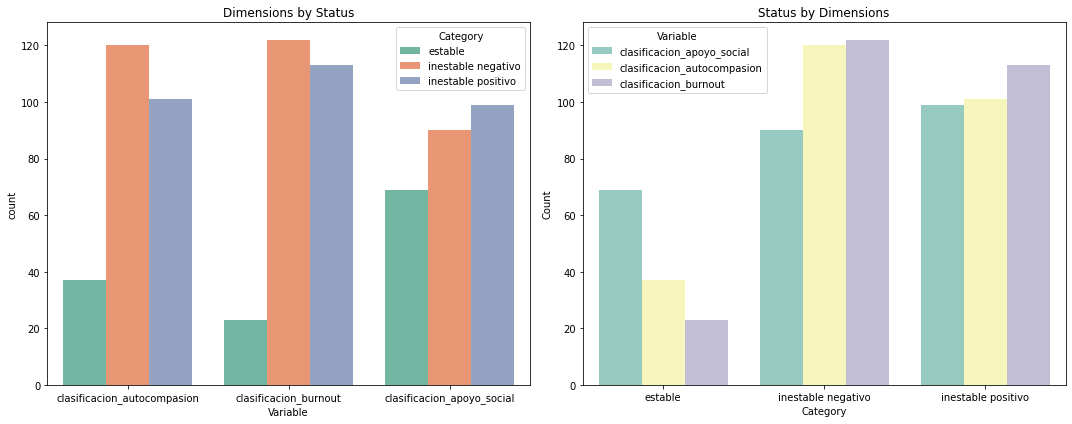

In [39]:
palette_dimensions = 'Set2'
palette_status = 'Set3'

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the first chart on the left subplot with the specified color palette
sns.countplot(x='Variable', hue='Category', data=df_melted, ax=axes[0], palette=palette_dimensions)
axes[0].set_title('Dimensions by Status')

# Plot the second chart on the right subplot with a different color palette
sns.barplot(x='Category', y='Count', hue='Variable', data=combinations, 
            order=combinations['Category'].unique(), ax=axes[1], palette=palette_status)
axes[1].set_title('Status by Dimensions')

# Adjust layout to prevent clipping of titles and labels
plt.tight_layout()

# Show the plots
plt.show()